<a href="https://colab.research.google.com/github/pjmartel/jupyter-notebooks/blob/master/Michaelis_Menten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from scipy.stats import linregress


## Estimativa experimental de parâmetros de cinética enzimática

Assumindo que o comportamento cinético de um enzima (varação da velocida inicial $v_i$ com a concentração de substrao $[S]$) é dado por:

$$v_i = \frac{V_{max}[S]}{K_m+[S]}$$

pretende-se estimar os parâmetros $V_{max}$ e $K_m$ a partir de um conjunto de velocidades experimentais $v_1,v_2,v_2,v_3,...,v_n$ obtidas para concentraçãoes de substrato $[S]_1,[S]_2,[S]_3,...,[S]_n$. A equação de Michaelis-Mente descreve uma hipérbole:

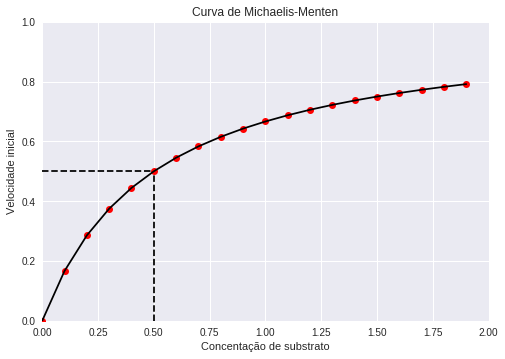

In [2]:
#@title
Km = 0.5 ; Vmax = 1.0
def MM(K,V,s):
  return V*s/(K+s)
s = np.arange(0.0,2.0,0.1)
v = MM(Km,Vmax,s)
plt.plot(s,v,"ro",s,v,"k-")
plt.hlines(0.5,0,0.5,linestyle="dashed")
plt.vlines(0.5,0,0.5,linestyle="dashed")
plt.axis([0,2,0,1])
plt.xlabel("Concentação de substrato")
plt.ylabel("Velocidade inicial")
plt.title("Curva de Michaelis-Menten")
plt.show()

De um modo geral os pontos experimentais irão estar afectados de erro, pelo que o seu ajusto à curva não será perfeito. O slider abaixo permite alterar o valor do "erro" aleatório adicionado aos valores teóricos (recalcular as células após ajustar o valor):

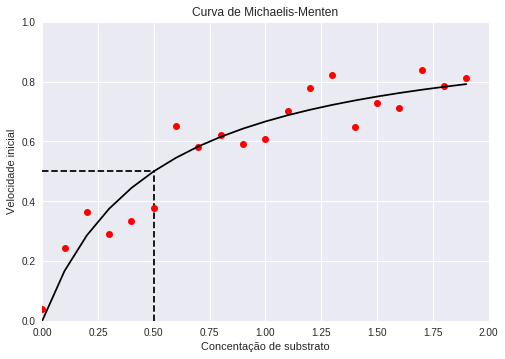

In [3]:
#@title 
std_err = 0.12 #@param {type:"slider", min:0.0, max:1, step:0.01}
err = rnd.normal(0,std_err,len(v))
ve = v + err
plt.plot(s,ve,"ro",s,v,"k-")
plt.hlines(0.5,0,0.5,linestyle="dashed")
plt.vlines(0.5,0,0.5,linestyle="dashed")
plt.axis([0,2,0,1])
plt.xlabel("Concentação de substrato")
plt.ylabel("Velocidade inicial")
plt.title("Curva de Michaelis-Menten")
plt.show()

A estimação dos parâmetros $V_{max}$ e $K_m$ pode fazer-se por ajuste não-linear directo da curva de Michaelis-Menten aos pontos experimentais (busca dos valores dos parâmetros que minimizam a distância da curva aos pontos experimantais). No entanto, é práctica usual fazer uma *linearização* prévia dos dados experimentais, de modo a transformar o problema do ajuste não-linear num problema de regressão linear simples. Existem alguns métodos de liearização mais usuais, a saber:
- Linearizaçao de Lineweaver-Burke
- Linearização de Hanes-Woolfe
- Linearização de Eadie-Hofstee
- Método linear directo de Eisenthal e Cornish-Bowden

A linearização de Linweaver-Burke é a mais antiga e mais usada, consisintdo na simples inversão dos lados esquerdo e direito da equação de Michaeliz-Menten:
<br><br>
$$v_i = \frac{V_{max}[S]_i}{K_m+[S]_i}$$
<br>
$${1 \over v_i} = \frac{K_m+[S]_i}{V_{max}[S]_i}$$
<br>
$${1 \over v_i} = \frac{K_m}{V_{max}}\frac{1}{[S]_i}+{1 \over V_{max}}$$
<br>
desta forma, um gráfico teórico (sem erro experimental dos valores dos valores ${1 \over v_i}$ em função dos correspondentes  ${1 \over [S]_i}$ deverá produzir um recta: 

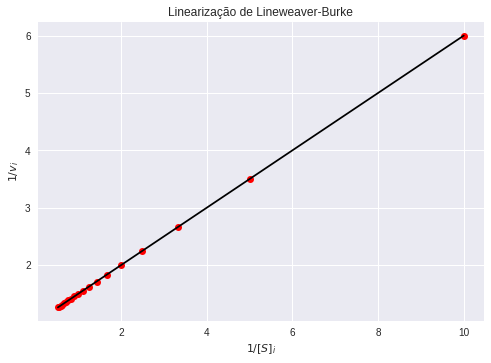

In [4]:
#@title
sinv = 1 /s[1:]
vinv = 1 /v[1:]
plt.plot(sinv,vinv,"ro",sinv,vinv,"k-")
#plt.hlines(0.5,0,0.5,linestyle="dashed")
#plt.vlines(0.5,0,0.5,linestyle="dashed")
plt.axis()
plt.ylabel("$1/v_i$")
plt.xlabel("$1/[S]_i$")
plt.title("Linearização de Lineweaver-Burke")
plt.show()

Na presença de erro experimental:

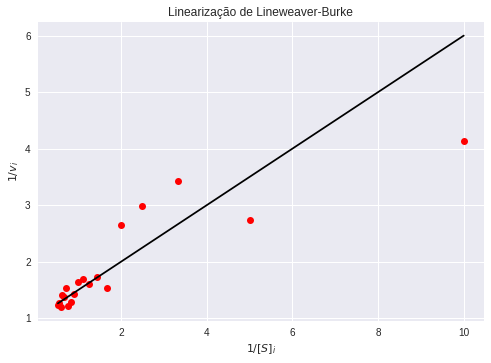

In [5]:
#@title
veinv = 1 /ve[1:]
plt.plot(sinv,veinv,"ro",sinv,vinv,"k-")
#plt.hlines(0.5,0,0.5,linestyle="dashed")
#plt.vlines(0.5,0,0.5,linestyle="dashed")
plt.axis()
plt.ylabel("$1/v_i$")
plt.xlabel("$1/[S]_i$")
plt.title("Linearização de Lineweaver-Burke")
plt.show()

Regressão linear para estimativa dos parâmetros

Vmax = 0.778
Km = 0.256
R² = 0.874


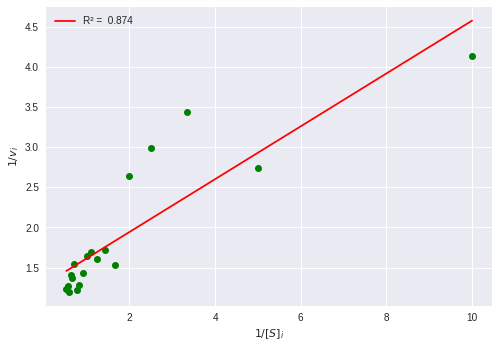

In [6]:
#@title
m, b,r,_,_ = linregress(sinv,veinv)
plt.ylabel("$1/v_i$")
plt.xlabel("$1/[S]_i$")
_ = plt.plot(sinv,veinv,'go')
_ = plt.plot(sinv,m*sinv+b,'r-',label="R² = {:6.3f}".format(r))
plt.legend()
print("Vmax = {:.3f}".format(1/b))
print("Km = {:.3f}".format(m/b))
print("R² = {:0.3f}".format(r))

O métod de Lineweaver-Burke tem o problema de criar distorção no padrão de dstribuição dos erros das velocidades, devido à passagem ao inverso. Assim, os erros das velocidades mais baixas são ampliados, e os das velocidades mais altas comprimidos. 

Exemlo de dados em que se observa distorção considerável do erro.

|$[S]_i$|$v_i $|
|----------|----------|
| 0.98  |  10.0     |
| 1.95  | 12.0 |
| 3.91   | 28.0 |
| 7.81  | 40.0 |
| 15.63 | 55.0 |
| 31.25  | 75.0 |
| 62.5 | 85.0 |
| 125  | 90.0|
| 250  | 97.0|





Vamos começar por calcular a linerização de Lineweaver-Burke e mostrar o ajuste dos pontos à recta:

Estimativa de Vmax = 79.553
Estimativa de Km = 7.625
R² = 0.967


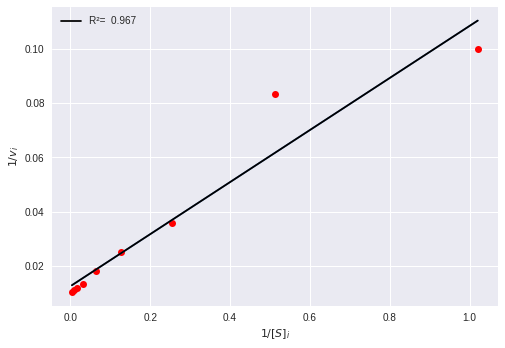

In [7]:
#@title
s = np.array([0.98,1.95,3.91,7.81,15.63,31.25,62.5,125,250])
v = np.array([10,12,28,40,55,75,85,90,97],dtype="float")
m,b,r,_,_ = linregress(1/s,1/v)
Vmax = 1/b
Km = m/b
print("Estimativa de Vmax = {:.3f}".format(1/b))
print("Estimativa de Km = {:.3f}".format(m/b))
print("R² = {:0.3f}".format(r))
plt.plot(1/s,1/v,"ro",1/s,m*(1/s)+b)
plt.plot(1/s,m*(1/s)+b,"k-",label="R²= {:6.3f}".format(r))
plt.ylabel("$1/v_i$")
plt.xlabel("$1/[S]_i$")
plt.legend()
plt.show()

O gráfico acima mostra uma divergência acentuada dos pontos à recta. Vamos analisar o ajuste dos ponts não transformados à hipérbole de M.-M. construída com os parâmetros estimados:

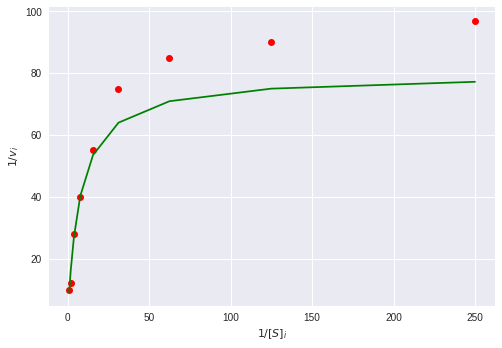

In [8]:
#@title
plt.ylabel("$1/v_i$")
plt.xlabel("$1/[S]_i$")
_ = plt.plot(s,v,"ro",s,MM(7.6,79.55,s),"g-")

Aqui mostra-se o ajust dos prontos experimentais aos valores "verdadeiros" ($V_{max} = 100, K_m = 12$) aos valores experimentais. Notar o erro nas concentrações de substratos mais baixas:

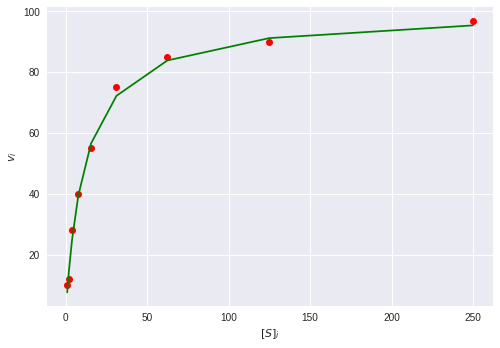

In [9]:
#@title
plt.ylabel("$v_i$")
plt.xlabel("$[S]_i$")
_ = plt.plot(s,v,"ro",s,MM(12,100,s),"g-")


O erro das concentrações baixas é claramente evidenciado pelo gráfico dos residuais (distância dos pontos à curva de M.,-M.):

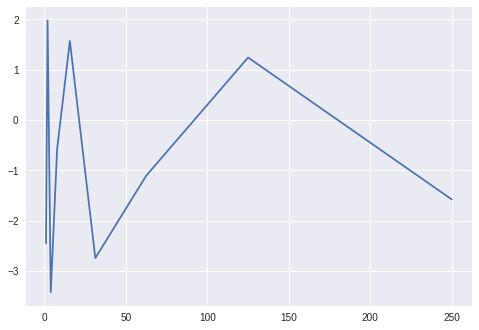

In [10]:
#@title
_ = plt.plot(s,MM(12,100,s)-v)